# Visualization of Features and Exploratory Analysis
Here we look at the extracted fetures and do some exploratory analysis.

In [1]:
#load libraries
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.discriminant_analysis
import sklearn.manifold 
import librosa.display
import numpy
import random
import pandas
import seaborn
import json

### Load Features
After the extraction of the features using the code provided in **Feature_Extraction.ipynb** we can simply load them from the .txt files (this will save time since feature extration can take a while).

In [2]:
with open('visualization-data-norm.txt', 'r') as filehandle:
    y = json.load(filehandle)
with open('visualization-data-unnorm.txt', 'r') as filehandle:
    y1 = json.load(filehandle)
with open('visualization-fs.txt', 'r') as filehandle:
    fs = json.load(filehandle)

In [3]:
##convert mfccs from list to numpy array that are faster to work with
x=[]
for t in y:
    x.append({"artist": t["artist"],"song": t["song"],"mfcc":numpy.asarray(t["mfcc"])})
    
x1=[]
for t in y1:
    x1.append({"artist": t["artist"],"song": t["song"],"mfcc":numpy.asarray(t["mfcc"])})
    
    
    
#set n_mfcc by looking at the shape of the feature in the file
n_mfcc=x[0]["mfcc"].shape[1]
#n_mfcc

### Visualize mfccs of a song

artist: Coldplay
song: Swallowed In the Sea
shape:
(704, 12)
means:
[ 7.62784938e-09 -5.22016886e-09 -9.89199510e-10 -7.88531906e-10
  1.04145411e-09 -6.39209413e-10 -8.83218573e-09 -1.20108904e-08
 -5.74617784e-09  3.28583899e-09 -2.28597359e-09 -5.41992697e-09]
var:
[1.         1.00000001 1.00000001 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


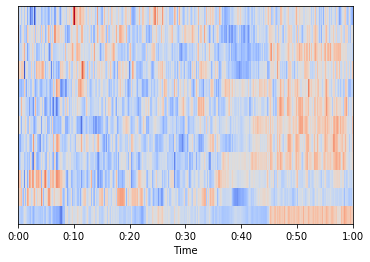

In [4]:
##NORMALIZED FEATURES

#set song index
i=40

#print info on the song
print("artist: "+x[i]["artist"])
print("song: "+x[i]["song"])

#print shape of extracted features
mfcc=x[i]["mfcc"]
print("shape:")
print(mfcc.shape)

#print meand and variance (since here are normalized we must get values close to zero and one respectively)
print("means:")
print(mfcc.mean(axis=0))
print("var:")
print(mfcc.var(axis=0))

#display mfccs
librosa.display.specshow(mfcc.T, sr=fs, x_axis='time')
plt.show()

artist: Coldplay
song: Swallowed In the Sea
shape:
(704, 12)
means:
[-139.17995116   78.40848767    3.53325528    9.85574481  -31.00489427
   -7.7124686   -12.14898343    3.58370447  -17.02981032   -1.84189106
  -21.89407184   -3.62586533]
var:
[7861.846445    757.8814381   493.30060513  278.07548941  232.33723726
  195.07677366  150.70538297  101.85829713   94.43700384  102.93287219
   64.93556765   57.0695297 ]


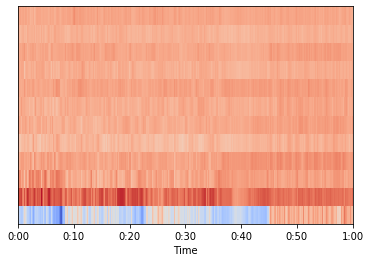

In [5]:
#set song index
i=40

#print info on the song
print("artist: "+x1[i]["artist"])
print("song: "+x1[i]["song"])

#print shape of extracted features
mfcc=x1[i]["mfcc"]
print("shape:")
print(mfcc.shape)

#print meand and variance
print("means:")
print(mfcc.mean(axis=0))
print("var:")
print(mfcc.var(axis=0))

#display mfccs
librosa.display.specshow(mfcc.T, sr=fs, x_axis='time')
plt.show()

### Prepare data for PCA visualization

In [6]:
##create a list of artist in the dataset
artistlist=[]
for t in x:
    if t["artist"] not in artistlist:
        artistlist.append(t["artist"])
artistlist.sort()
#print(artistlist)

In [7]:
##############################################
#####data for PCA visualization at frame level
##############################################

###create a matrix with all frames of all songs
all_mfcc=numpy.empty((1,n_mfcc))
for t in x1:
    all_mfcc=numpy.vstack((all_mfcc, t["mfcc"]))
all_mfcc=numpy.delete(all_mfcc,0,0)
scaler = sklearn.preprocessing.StandardScaler()
all_mfcc=scaler.fit_transform(all_mfcc)

###create a list of corresponding labels and convert to pandas df
all_labels=[]
for t in x1:
    for _ in range(t["mfcc"].shape[0]):
        all_labels.append(t["artist"])
all_labels=pandas.DataFrame(all_labels, columns = ["artist"])
#all_labels

#create data frame with first two pc and artist label for the mfccs of all frames
PCA = sklearn.decomposition.PCA(n_components=2)
mfcc_principalComponents = PCA.fit_transform(all_mfcc)
mfcc_principalComponents = pandas.DataFrame(data = mfcc_principalComponents, columns = ['pc1', 'pc2'])
df_frames = pandas.concat([mfcc_principalComponents, all_labels],axis=1)
#df_frames

In [8]:
##############################################
######data for PCA visualization at song level
##############################################

#for each song take the average of their mfccs along all its frames
song_mfcc=numpy.empty((1,n_mfcc))
for t in x1:
    song_mfcc=numpy.vstack((song_mfcc, t["mfcc"].sum(axis=0)))
song_mfcc=numpy.delete(song_mfcc,0,0)
scaler = sklearn.preprocessing.StandardScaler()
song_mfcc=scaler.fit_transform(song_mfcc)


#create a label with artist for the above averages
song_labels=[]
for t in x1:
    song_labels.append(t["artist"])
song_labels=pandas.DataFrame(song_labels, columns = ["artist"])

#create data frame with first two pc and artist label for the mfccs of all frames
PCA = sklearn.decomposition.PCA(n_components=2)
mfcc_avg_principalComponents = PCA.fit_transform(song_mfcc)
mfcc_avg_principalComponents = pandas.DataFrame(data = mfcc_avg_principalComponents, columns = ['pc1', 'pc2'])
df_song = pandas.concat([mfcc_avg_principalComponents, song_labels],axis=1)
#df_song

### PCA visualization both at frame and song level

c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


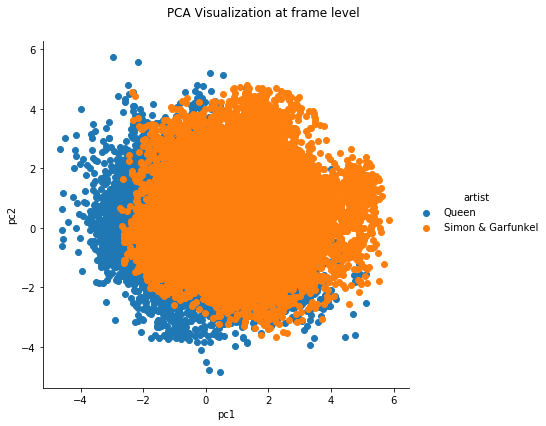

In [9]:
###RUN code to get data for this visualization before visualizing
###because the differt kind of visualization may have conflicting names


#manual way
"""fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of Frames', fontsize = 20)

targets = artistlist
colors = ['r','g','b','c','m','y','k']
for target, color in zip(targets,colors):
    indicesToKeep = df_frames['artist'] == target
    ax.scatter(df_frames.loc[indicesToKeep, 'pc1']
               , df_frames.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50
               , alpha=0.5)
ax.legend(targets)
ax.grid()"""



#alternative one line code
#filter to show only desidered artists. to show all use artistlist in place of printlist
#artist are 'Coldplay', 'Ed Sheeran', "Guns N' Roses", 'Passenger', 'Queen', 'Simon & Garfunkel', 'The Beatles'
printlist=['Queen','Simon & Garfunkel']
p=seaborn.FacetGrid(df_frames[df_frames.artist.isin(printlist)],hue="artist", size=6)
p.map(plt.scatter, "pc1", "pc2")
p.add_legend()
plt.subplots_adjust(top=0.9)
p.fig.suptitle('PCA Visualization at frame level') 
plt.show()

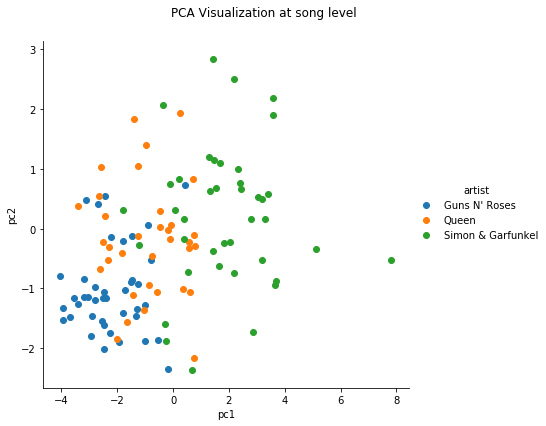

In [10]:
###RUN code to get data for this visualization before visualizing
###because the differt kind of visualization may have conflicting names

"""fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of songs', fontsize = 20)

targets = artistlist
colors = ['r','g','b','c','m','y','k']
for target, color in zip(targets,colors):
    indicesToKeep = df_song['artist'] == target
    ax.scatter(df_song.loc[indicesToKeep, 'pc1']
               , df_song.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50
               , alpha=0.8)
ax.legend(targets)
ax.grid()
"""

#alternative
#filter to show only desidered artists. to show all use artistlist in place of printlist
#artist are 'Coldplay','Ed Sheeran','Ligabue','Passenger','Queen','Simon & Garfunkel','Tiziano Ferro'
printlist=['Queen','Simon & Garfunkel',"Guns N' Roses" ]
p=seaborn.FacetGrid(df_song[df_song.artist.isin(printlist)],hue="artist", height=6)
p.map(plt.scatter, "pc1", "pc2")
p.add_legend()
plt.subplots_adjust(top=0.9)
p.fig.suptitle('PCA Visualization at song level') 
plt.show()

In [11]:
###work in progr

In [12]:


#for each song take the average of their mfccs along all its frames
song_mfcc=numpy.empty((1,n_mfcc))
for t in x1:
    song_mfcc=numpy.vstack((song_mfcc, t["mfcc"].sum(axis=0)))
song_mfcc=numpy.delete(song_mfcc,0,0)
#scaler = sklearn.preprocessing.StandardScaler()
#song_mfcc=scaler.fit_transform(song_mfcc)


#create a label with artist for the above averages
song_labels=[]
for t in x1:
    song_labels.append(t["artist"])
song_labels=pandas.DataFrame(song_labels, columns = ["artist"])



In [13]:
embedd = sklearn.manifold.TSNE(n_components=3,perplexity=13).fit_transform(song_mfcc)
embedd = pandas.DataFrame(data = embedd, columns = ['x1', 'x2','x3'])
df_embedd = pandas.concat([embedd, song_labels],axis=1)

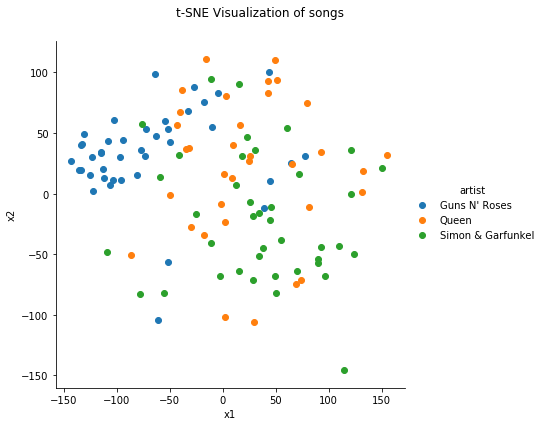

In [14]:
printlist=['Queen','Simon & Garfunkel',"Guns N' Roses" ]
p=seaborn.FacetGrid(df_embedd[df_embedd.artist.isin(printlist)],hue="artist", height=6)
p.map(plt.scatter, "x1", "x2")
p.add_legend()
plt.subplots_adjust(top=0.9)
p.fig.suptitle('t-SNE Visualization of songs') 
plt.show()

In [15]:
"""import plotly.express as px
printlist=['Queen','Simon & Garfunkel',"Guns N' Roses" ]
fig = px.scatter_3d(df_embedd[df_embedd.artist.isin(printlist)], x='x1', y='x2', z='x3',
              color='artist')
fig.show()"""


'import plotly.express as px\nprintlist=[\'Queen\',\'Simon & Garfunkel\',"Guns N\' Roses" ]\nfig = px.scatter_3d(df_embedd[df_embedd.artist.isin(printlist)], x=\'x1\', y=\'x2\', z=\'x3\',\n              color=\'artist\')\nfig.show()'

In [ ]:
###work in progress



"""
seaborn.distplot(all_mfcc[:,6], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()
"""


#g = seaborn.PairGrid(pandas.DataFrame(all_mfcc))
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)
#g

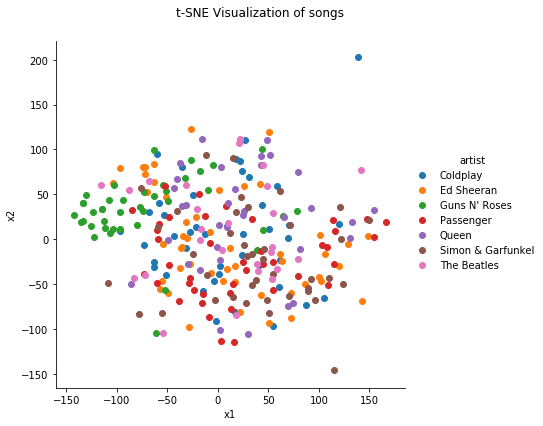

In [31]:
#UMAP

#for each song take the average of their mfccs along all its frames
song_mfcc=numpy.empty((1,n_mfcc))
for t in x1:
    song_mfcc=numpy.vstack((song_mfcc, t["mfcc"].sum(axis=0)))
song_mfcc=numpy.delete(song_mfcc,0,0)
#scaler = sklearn.preprocessing.StandardScaler()
#song_mfcc=scaler.fit_transform(song_mfcc)


#create a label with artist for the above averages
song_labels=[]
for t in x1:
    song_labels.append(t["artist"])
song_labels=pandas.DataFrame(song_labels, columns = ["artist"])





import umap
reducer = umap.UMAP(n_neighbors=200)
embedding = reducer.fit_transform(song_mfcc)
embedding = pandas.DataFrame(data = embedding, columns = ['x1', 'x2'])
df = pandas.concat([embedding, song_labels],axis=1)


printlist=['Queen','Simon & Garfunkel',"Guns N' Roses" ]
p=seaborn.FacetGrid(df_embedd[df_embedd.artist.isin(artistlist)],hue="artist", height=6)
p.map(plt.scatter, "x1", "x2")
p.add_legend()
plt.subplots_adjust(top=0.9)
p.fig.suptitle('t-SNE Visualization of songs') 
plt.show()